In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# What we are given:

In [2]:
pd.set_option('display.max_rows', None)
spend = pd.read_csv('spend_data.csv', parse_dates=['date'])
spend.head()

,Unnamed: 0,date,campaign,spend
0,1,2020-05-24,facebook_5_B,17.0238
1,2,2020-05-24,facebook_5_D,1.7034
2,3,2020-05-24,instagram_5_B,14.8920
3,4,2020-05-24,instagram_5_D,1.6116
4,6,2020-05-25,facebook_5_B,22.6644


In [3]:
spend=pd.DataFrame(spend)

In [4]:
spend.drop(spend.columns[0], axis=1, inplace=True)
spend.head()

,date,campaign,spend
0,2020-05-24,facebook_5_B,17.0238
1,2020-05-24,facebook_5_D,1.7034
2,2020-05-24,instagram_5_B,14.8920
3,2020-05-24,instagram_5_D,1.6116
4,2020-05-25,facebook_5_B,22.6644


In [5]:
trials = pd.read_csv('trials_data.csv', parse_dates=['date'])

In [6]:
trials=pd.DataFrame(trials)

In [7]:
trials.drop(trials.columns[0], axis=1, inplace=True)
trials.head()

,date,trials
0,2020-05-01,0.0
1,2020-05-02,0.0
2,2020-05-03,0.0
3,2020-05-04,0.0
4,2020-05-05,0.0


# 1- Merging two data:

In [8]:
data=pd.merge(trials,spend,on='date')
data.head(5)

,date,trials,campaign,spend
0,2020-05-24,0.0,facebook_5_B,17.0238
1,2020-05-24,0.0,facebook_5_D,1.7034
2,2020-05-24,0.0,instagram_5_B,14.8920
3,2020-05-24,0.0,instagram_5_D,1.6116
4,2020-05-25,1.0,facebook_5_B,22.6644


# 2- Data exploration by history: 

In [9]:
# total amount of money spent over whole period of time
round(data['spend'].sum(),2)

1635002.21

In [10]:
# total number of trials happend over whole period of time
round(data['trials'].sum())

598437

<AxesSubplot:xlabel='date'>

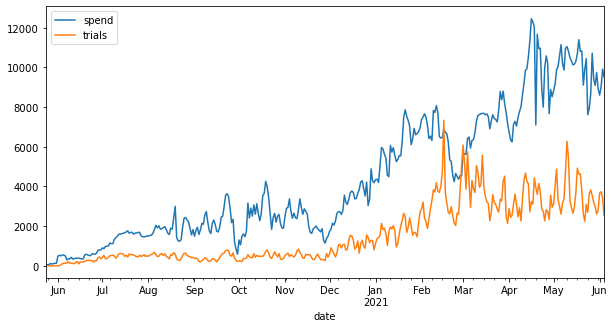

In [11]:
#plot1
# first let us look at the histroy of spending money and trials over the time (we groupby the date)
# it seems the client has increased the spending over last couple of months, however, the number of 
# trials remained almost constant. So the strategy of allocating was not efficient. 
data.groupby(by='date').sum()[['spend','trials']].plot(figsize=(10, 5))

In [12]:
data.groupby(by='campaign').sum()[['spend']].sort_values(by='spend',ascending=False)

,spend
campaign,
facebook_1_A,662534.318977
instagram_2_C,196848.400901
facebook_3_A,181740.999000
facebook_2_C,115737.396794
facebook_5_B,96329.558588
instagram_5_B,90357.940736
apple_4_D,87203.053800
apple_1_A,66856.073400
facebook_5_D,55673.730102


In [13]:
data.groupby(by='campaign').sum()[['trials']].sort_values(by='trials',ascending=False)

,trials
campaign,
facebook_2_C,86419.0
instagram_2_C,86197.0
apple_4_D,85417.0
facebook_1_A,77639.0
facebook_1_D,49936.0
instagram_1_D,49936.0
facebook_3_A,31528.0
facebook_5_A,22274.0
facebook_5_D,20026.0


<AxesSubplot:ylabel='Frequency'>

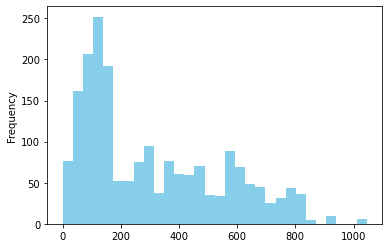

In [14]:
#plot2
# tirals around 0-200 occured more often
data['trials'].plot.hist(bins=30,color = "skyblue")

<AxesSubplot:ylabel='Frequency'>

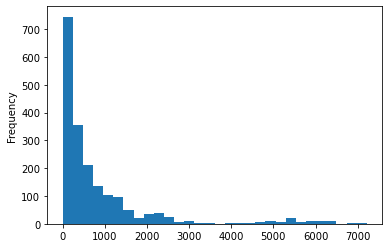

In [15]:
#plot3
# the most occured amount of spend money on campaigns are around 0-500 $
data['spend'].plot.hist(bins=30)

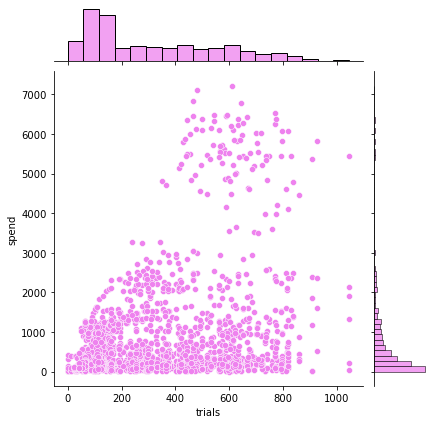

In [16]:
#plot4
# this jointplot indicates that for high spending  the number of trials tend to increase. which is natural
sns.jointplot(x='trials',y='spend',data=data, color='violet')

# 3- What information the data provide?

In [17]:
# here we separet different targets. so split each campain by its target type and audiance type.
data_separated_targets = data.assign(Target_type =data['campaign'].str[-3:-2],Target_audiance =data['campaign'].str[-1:])

In [18]:
#pd.set_option('display.max_rows', None)
data_separated_targets.head(5)

,date,trials,campaign,spend,Target_type,Target_audiance
0,2020-05-24,0.0,facebook_5_B,17.0238,5,B
1,2020-05-24,0.0,facebook_5_D,1.7034,5,D
2,2020-05-24,0.0,instagram_5_B,14.8920,5,B
3,2020-05-24,0.0,instagram_5_D,1.6116,5,D
4,2020-05-25,1.0,facebook_5_B,22.6644,5,B


In [19]:
#replace the campain with network.
data_separated_targets  = data_separated_targets.assign(campaign =data['campaign'].str[:-4])

In [20]:
data_separated_targets.head()

,date,trials,campaign,spend,Target_type,Target_audiance
0,2020-05-24,0.0,facebook,17.0238,5,B
1,2020-05-24,0.0,facebook,1.7034,5,D
2,2020-05-24,0.0,instagram,14.8920,5,B
3,2020-05-24,0.0,instagram,1.6116,5,D
4,2020-05-25,1.0,facebook,22.6644,5,B


In [21]:
data_separated_targets.groupby(by='campaign').sum()

,trials,spend
campaign,,
apple,120254.0,1.654544e+05
facebook,305898.0,1.133275e+06
instagram,172285.0,3.362726e+05


In [22]:
data_separated_targets.groupby(by='Target_audiance').sum()

,trials,spend
Target_audiance,,
A,166278.0,931579.198777
B,36152.0,186687.499324
C,172616.0,312585.797695
D,223391.0,204149.711814


In [23]:
data_separated_targets.groupby(by='Target_type').sum()

,trials,spend
Target_type,,
1,197006.0,753489.245186
2,172616.0,312585.797695
3,31528.0,181740.999000
4,85417.0,87203.053800
5,111870.0,299983.111929


# 4- First intuition about different networks, types and audience: 

<AxesSubplot:xlabel='trials', ylabel='spend'>

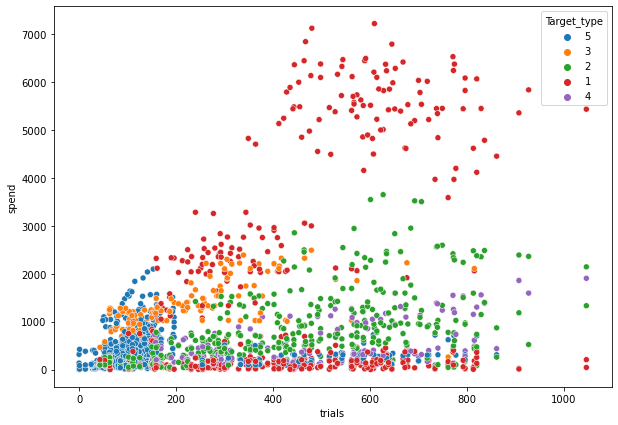

In [24]:
#plot5
# this separation over target_types indicates that we might have more efficient on campaigns with 
# target_type 1  and 5 (down red  and blue points) which spend less money.
# 1,2,..5 in the plot are target types.
plt.figure(figsize=(10,7))
sns.scatterplot(data=data_separated_targets ,x='trials',y='spend',hue='Target_type' )

<AxesSubplot:xlabel='trials', ylabel='spend'>

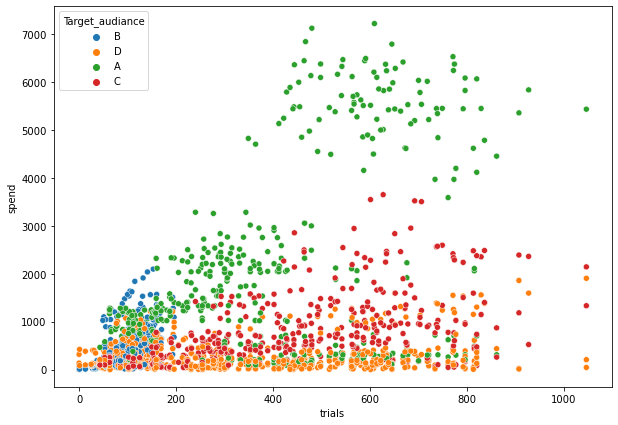

In [25]:
#plot6
# following plot indicates that the audiancese group D and A shows less spending (orange and green points on bottom 
# points with minimum spending) for even high trials. 
plt.figure(figsize=(10,7))
sns.scatterplot(data=data_separated_targets ,x='trials',y='spend',hue='Target_audiance' )

<AxesSubplot:xlabel='trials', ylabel='spend'>

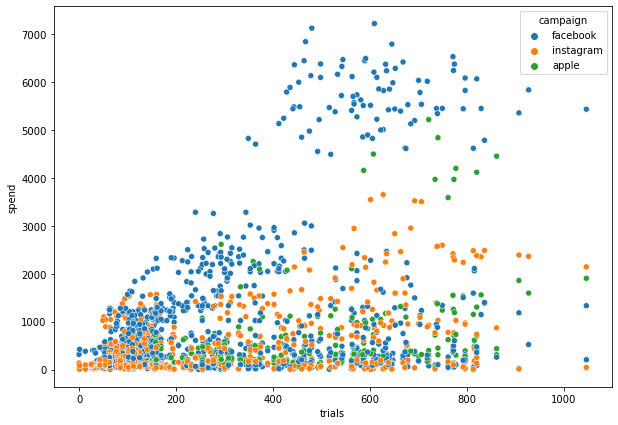

In [26]:
#plot7
# this plot actually does not indicate which netwrok givs better spend, becuase we see that all 3 colors are present
# in the small spending regions.
plt.figure(figsize=(10,7))
sns.scatterplot(data=data_separated_targets ,x='trials',y='spend',hue='campaign')

# 5- First intuition about the 14 different campaigns: 

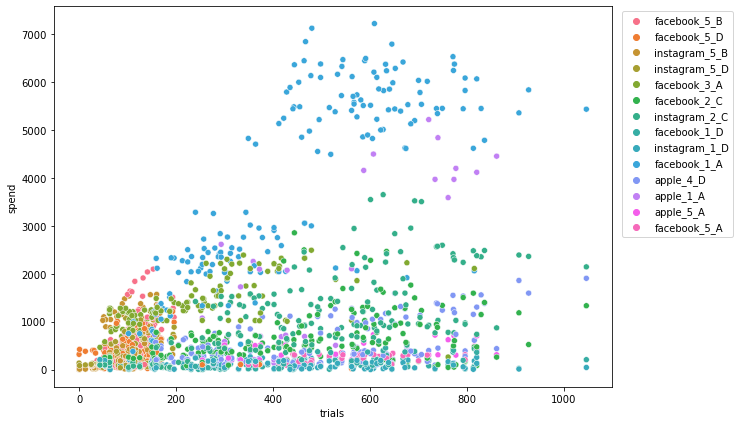

In [27]:
#plot8
# the following scatter plot shows the money spent and the number of trails for each campaign. In the first glance
# we can see the colors related to points instagram_1_D or facebook_1_D has higher trials while spending less 
# money --> so, more efficient
plt.figure(figsize=(10,7))
sns.scatterplot(data=data,x='trials',y='spend',hue="campaign" )

plt.legend(bbox_to_anchor=(1.01, 1))

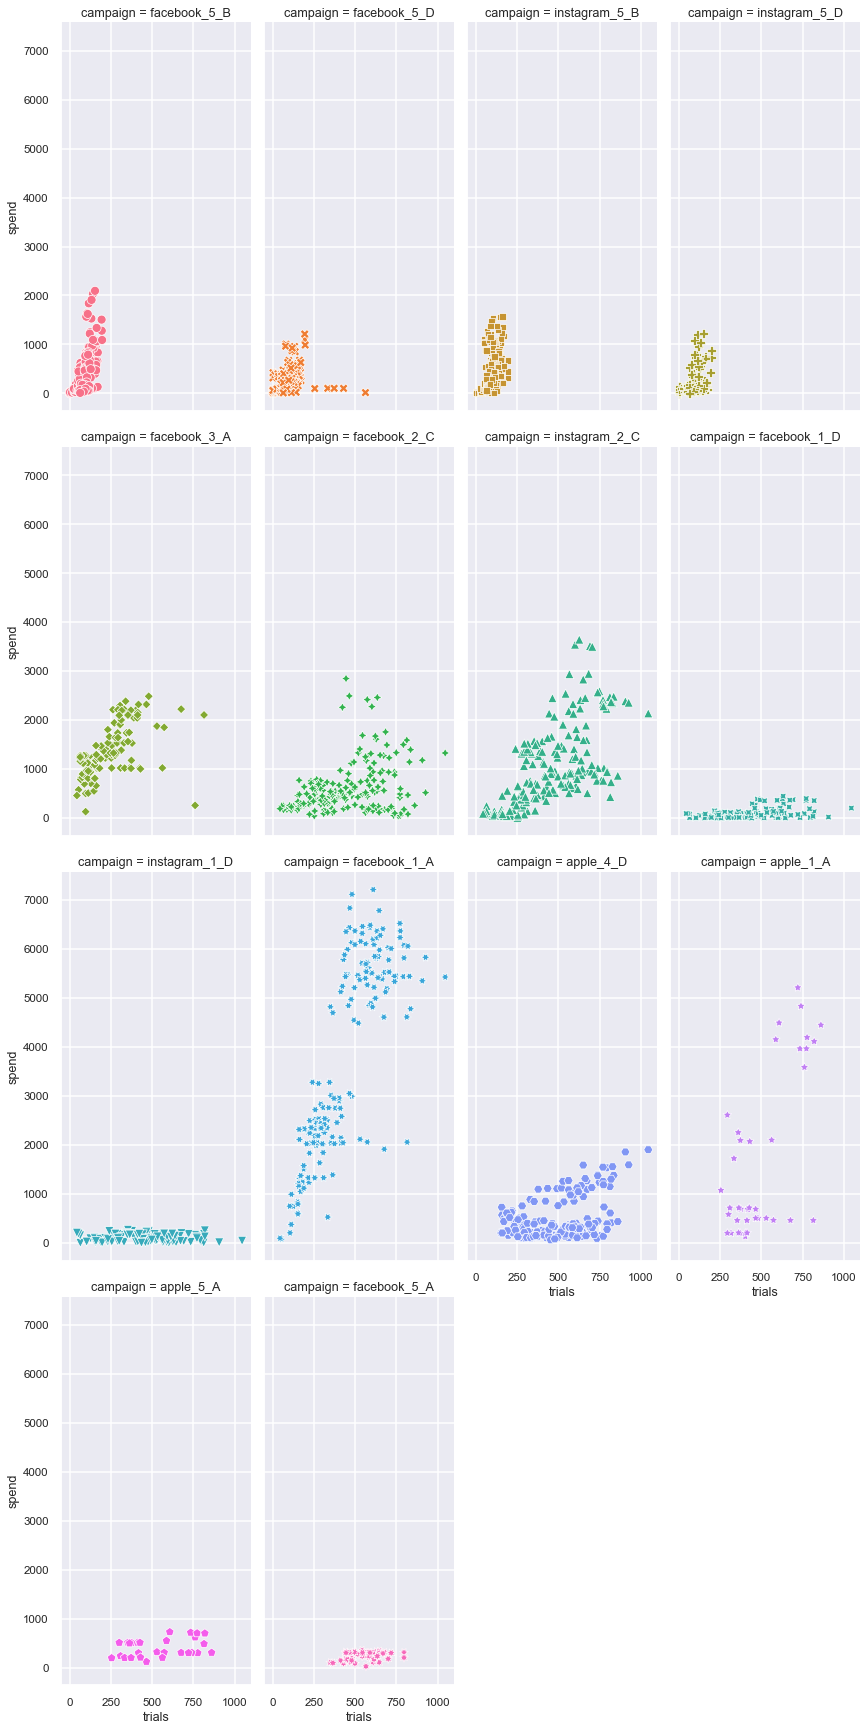

In [28]:
#plot9
# in order to better see the latter outcome, we vitualize all 14 campaigns. 
# these plots confirm that the best is instagram_1_D and facebook_1_D.
sns.set(rc={'figure.figsize':(40,40)}) 
sns.set_context('talk', font_scale=0.7) 
sns.relplot(data=data,x='trials',y='spend',hue="campaign",col="campaign",col_wrap=4,legend=False,height=6, 
                aspect=0.5, style='campaign', sizes=(500,400))

### In the table, we separate campaigns to do better data analysis

In [29]:
dummies=['campaign']

In [30]:
dummed_data= pd.get_dummies(data,columns=dummies)

In [31]:
dummed_data.head()

,date,trials,spend,campaign_apple_1_A,campaign_apple_4_D,campaign_apple_5_A,campaign_facebook_1_A,campaign_facebook_1_D,campaign_facebook_2_C,campaign_facebook_3_A,campaign_facebook_5_A,campaign_facebook_5_B,campaign_facebook_5_D,campaign_instagram_1_D,campaign_instagram_2_C,campaign_instagram_5_B,campaign_instagram_5_D
0,2020-05-24,0.0,17.0238,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2020-05-24,0.0,1.7034,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2020-05-24,0.0,14.8920,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2020-05-24,0.0,1.6116,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2020-05-25,1.0,22.6644,0,0,0,0,0,0,0,0,1,0,0,0,0,0


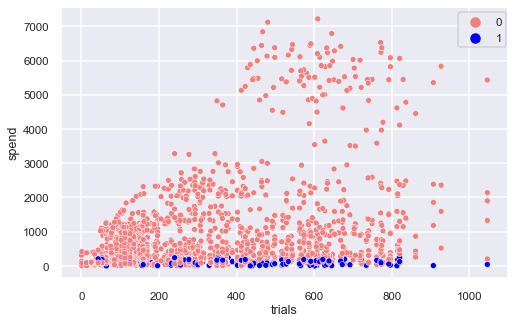

In [32]:
#plot10
# In this plot we see that when there was campaign instagram_1_D they spent much less than when they had other campaigns. 
# 0 (pink color) means there was no campaign 'instagram_1_D', while the 1 (blue color)  means there was no instagram_1_D.

plt.figure(figsize=(8,5))
sns.scatterplot(x='trials',y='spend',
                hue="campaign_instagram_1_D",s=35,palette=['lightcoral','blue'],
                data=dummed_data)
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1))

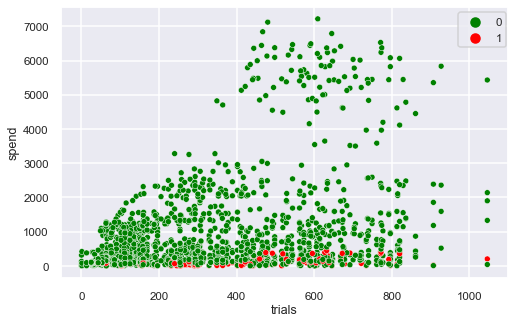

In [33]:
#plot11
# 0 means there was no "campaign_facebook_1_D" campaign, while 1 means there was "campaign_facebook_1_D".
plt.figure(figsize=(8,5))
sns.scatterplot(x='trials',y='spend',
                hue="campaign_facebook_1_D",s=35,data=dummed_data,palette=['green','red'],)
plt.legend(bbox_to_anchor=(1.01, 1))

In [34]:
# we groupby date
# the following plot indicates that spending more money does not nessesarely means having more trials. there are points
# with high trials but less spending. Such as points in (~7000 trials,~6000 spend) or  (~6000 trials,~6000 spend)
grouped_dummed_data= dummed_data.groupby("date", as_index=False)[dummed_data.columns].sum()
grouped_dummed_data.head()

,date,trials,spend,campaign_apple_1_A,campaign_apple_4_D,campaign_apple_5_A,campaign_facebook_1_A,campaign_facebook_1_D,campaign_facebook_2_C,campaign_facebook_3_A,campaign_facebook_5_A,campaign_facebook_5_B,campaign_facebook_5_D,campaign_instagram_1_D,campaign_instagram_2_C,campaign_instagram_5_B,campaign_instagram_5_D
0,2020-05-24,0.0,35.230800,0,0,0,0,0,0,0,0,1,1,0,0,1,1
1,2020-05-25,4.0,49.969800,0,0,0,0,0,0,0,0,1,1,0,0,1,1
2,2020-05-26,0.0,65.688000,0,0,0,0,0,0,0,0,1,1,0,0,1,1
3,2020-05-27,8.0,123.032400,0,0,0,0,0,0,0,0,1,1,0,0,1,1
4,2020-05-28,0.0,87.424214,0,0,0,0,0,0,0,0,1,1,0,0,1,1


Text(0, 0.5, 'spend')

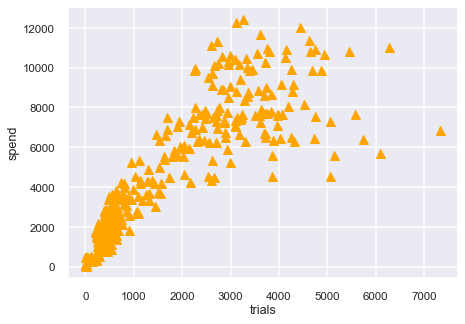

In [35]:
#plot12
plt.figure(figsize=(7,5))
plt.plot(grouped_dummed_data['trials'],grouped_dummed_data['spend'],'r^',
         color='orange',  lw=3)
plt.xlabel('trials')
plt.ylabel('spend')

# 6- First intuition on best week-day to invest

In [36]:
# for each day we show which day of the week it is
data['day_of_week'] = data['date'].dt.day_name()

In [37]:
data.head()

,date,trials,campaign,spend,day_of_week
0,2020-05-24,0.0,facebook_5_B,17.0238,Sunday
1,2020-05-24,0.0,facebook_5_D,1.7034,Sunday
2,2020-05-24,0.0,instagram_5_B,14.8920,Sunday
3,2020-05-24,0.0,instagram_5_D,1.6116,Sunday
4,2020-05-25,1.0,facebook_5_B,22.6644,Monday


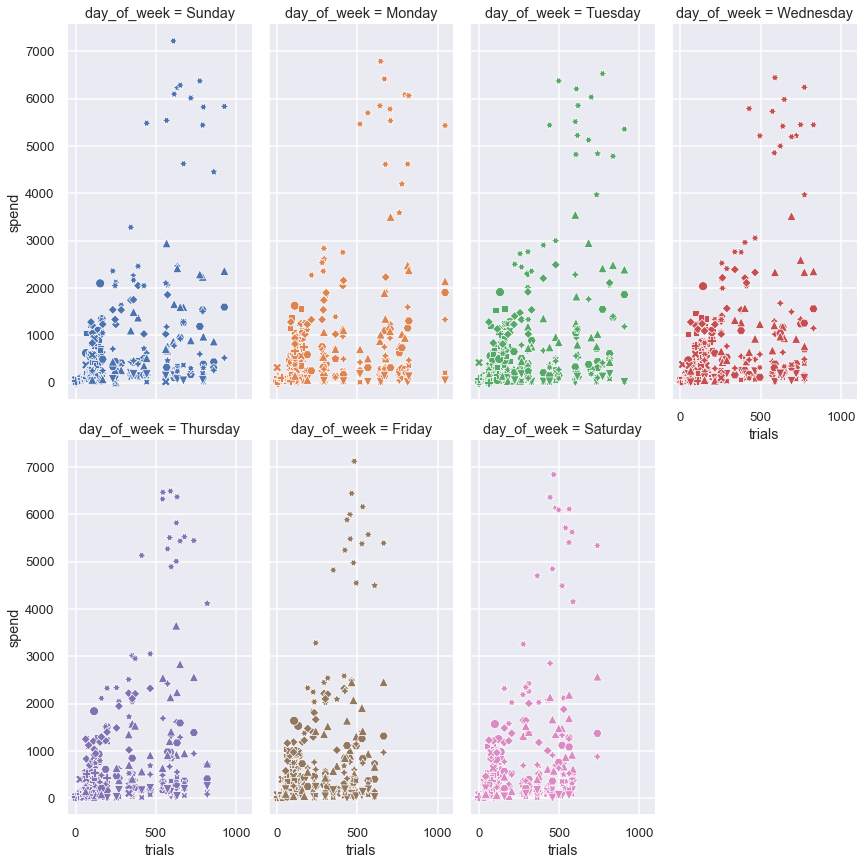

In [38]:
#plot13
#It seems that people downloaded the trials more often on Mondays and Sundays. The less downloaded day is Friday. However
# for finding the exact result furture investigation is nessesary. With fix spending.
sns.set_context('talk', font_scale=0.8) 
sns.relplot(data=data,x='trials',y='spend',hue="day_of_week",col="day_of_week",col_wrap=4,legend=False,height=6, 
                aspect=0.5, style='campaign', sizes=(500,400))

# 7- Exact resuls: Best champaign:

In [39]:
# first obtain the total spent money and total trials for each campaign.
campaign_trials=data.groupby(by='campaign').sum()[['spend','trials']].sort_values(by='spend',ascending=False)
campaign_trials

,spend,trials
campaign,,
facebook_1_A,662534.318977,77639.0
instagram_2_C,196848.400901,86197.0
facebook_3_A,181740.999000,31528.0
facebook_2_C,115737.396794,86419.0
facebook_5_B,96329.558588,18076.0
instagram_5_B,90357.940736,18076.0
apple_4_D,87203.053800,85417.0
apple_1_A,66856.073400,19495.0
facebook_5_D,55673.730102,20026.0


In [40]:
# now we assign 100 $ for all campaigns and obtain trials for each of them for the invested money.
campaign_trials = campaign_trials.assign(percent=campaign_trials['trials']*100/campaign_trials['spend'])
campaign_trials

,spend,trials,percent
campaign,,,
facebook_1_A,662534.318977,77639.0,11.718487
instagram_2_C,196848.400901,86197.0,43.788519
facebook_3_A,181740.999000,31528.0,17.347764
facebook_2_C,115737.396794,86419.0,74.668173
facebook_5_B,96329.558588,18076.0,18.764749
instagram_5_B,90357.940736,18076.0,20.004883
apple_4_D,87203.053800,85417.0,97.951845
apple_1_A,66856.073400,19495.0,29.159654
facebook_5_D,55673.730102,20026.0,35.970286


In [41]:
# to better see the result we sort by higher percentenge of the trials
# As seen 'instagram_1_D' gives higher trials for given 100$. This is same result as observed in data analysis.
campaign_trials.sort_values(by='percent', ascending=False)

,spend,trials,percent
campaign,,,
instagram_1_D,11892.162164,49936.0,419.906820
facebook_1_D,12206.690645,49936.0,409.087126
facebook_5_A,9052.510200,22274.0,246.053299
apple_5_A,11395.297200,15342.0,134.634488
apple_4_D,87203.053800,85417.0,97.951845
facebook_2_C,115737.396794,86419.0,74.668173
instagram_5_D,37174.075102,18076.0,48.625285
instagram_2_C,196848.400901,86197.0,43.788519
facebook_5_D,55673.730102,20026.0,35.970286


# 8- Exact resuls: Best week-day

In [42]:
data.head()

,date,trials,campaign,spend,day_of_week
0,2020-05-24,0.0,facebook_5_B,17.0238,Sunday
1,2020-05-24,0.0,facebook_5_D,1.7034,Sunday
2,2020-05-24,0.0,instagram_5_B,14.8920,Sunday
3,2020-05-24,0.0,instagram_5_D,1.6116,Sunday
4,2020-05-25,1.0,facebook_5_B,22.6644,Monday


In [43]:
week_day=data.groupby(by='day_of_week').sum()[['spend','trials']].sort_values(by='spend',ascending=False)
week_day

,spend,trials
day_of_week,,
Thursday,242880.450217,84045.0
Wednesday,241500.820146,86814.0
Tuesday,239125.444184,94692.0
Friday,232699.640702,72400.0
Sunday,230272.945789,91569.0
Monday,227088.117990,96093.0
Saturday,221434.788583,72824.0


In [44]:
week_day =week_day.assign(percent=week_day['trials']*100/week_day['spend'])
week_day.head(10)

,spend,trials,percent
day_of_week,,,
Thursday,242880.450217,84045.0,34.603444
Wednesday,241500.820146,86814.0,35.947704
Tuesday,239125.444184,94692.0,39.599299
Friday,232699.640702,72400.0,31.113069
Sunday,230272.945789,91569.0,39.765418
Monday,227088.117990,96093.0,42.315292
Saturday,221434.788583,72824.0,32.887335


In [45]:
week_day.sort_values(by='percent', ascending=False)

,spend,trials,percent
day_of_week,,,
Monday,227088.117990,96093.0,42.315292
Sunday,230272.945789,91569.0,39.765418
Tuesday,239125.444184,94692.0,39.599299
Wednesday,241500.820146,86814.0,35.947704
Thursday,242880.450217,84045.0,34.603444
Saturday,221434.788583,72824.0,32.887335
Friday,232699.640702,72400.0,31.113069
